## CSDN主页: https://blog.csdn.net/qq_43965708
## 文章链接：https://blog.csdn.net/qq_43965708/article/details/116483085
## <font color='red'>❤</font>整理不易！！！如果有帮助希望能够三连支持一下<font color='red'>❤</font>
## 有什么问题可以CSDN上私信哦

## 1. 获取数据

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")    # datasets\test
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # 创建目录
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")    # datasets\test\housing.tgz
    # 将housing_url下载的文件保存到tgz_path路径
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    # 解压到housing_path路径
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

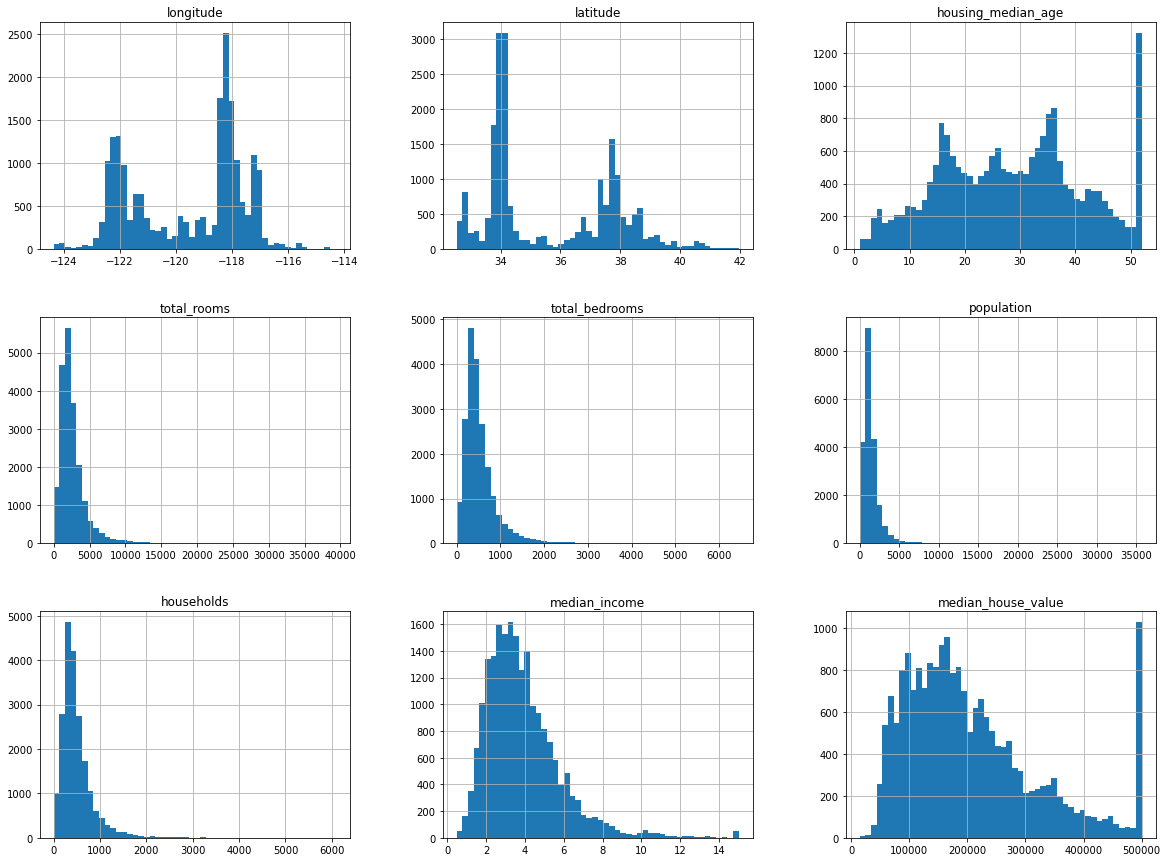

In [6]:
import matplotlib.pyplot as plt
# 绘制直方图
housing.hist(bins=50, figsize=(20,15))
# 保存图片
# plt.savefig("attribute_histogram_plots.png", dpi=300)

## 2. 划分测试集

<AxesSubplot:>

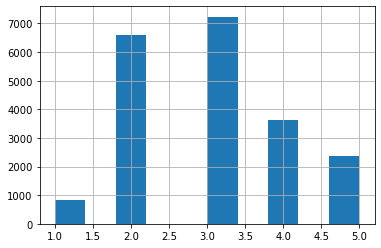

In [7]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
# 根据income_cat数据绘制直方图                   
housing["income_cat"].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in s.split(housing, housing["income_cat"]):
    # train_index: [17606 18632 14650 ... 13908 11159 15775]
    strat_train_set = housing.loc[train_index]
    # test_index: [5241 10970 20351 ...  4019 12107  2398]
    strat_test_set = housing.loc[test_index]

for dataset in (strat_train_set, strat_test_set):
    dataset.drop("income_cat", axis=1, inplace=True)
housing_train = strat_train_set.copy()

## 3.可视化获取更多信息

Text(0, 0.5, '纬度')

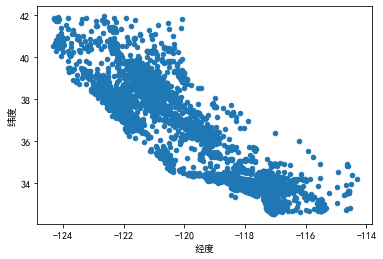

In [9]:
# 显示中文
plt.rcParams['font.family'] = 'SimHei'
# 显示负号
plt.rcParams['axes.unicode_minus'] = False

housing_train.plot(kind="scatter", x="longitude", y="latitude")
plt.xlabel('经度')
plt.ylabel('纬度')
# plt.savefig("bad_visualization_plot.png", dpi=300)

Text(0, 0.5, '纬度')

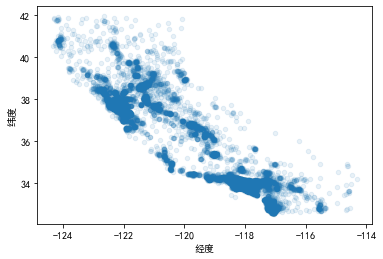

In [10]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.xlabel('经度')
plt.ylabel('纬度')
# plt.savefig("better_visualization_plot.png", dpi=300)

Text(0, 0.5, '纬度')

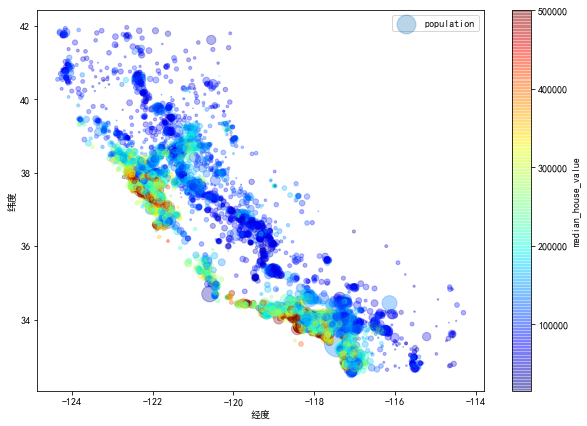

In [11]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
             s=housing_train["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.xlabel('经度')
plt.ylabel('纬度')
# plt.savefig("housing_prices_scatterplot.png", dpi=300)

## 4.寻找相关性

In [12]:
corr_matrix = housing_train.corr()
corr_matrix 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [13]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

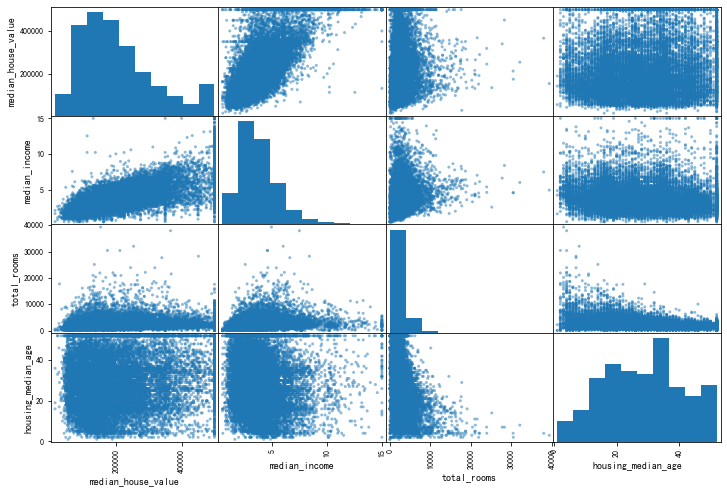

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))
# plt.savefig("scatter_matrix_plot.png", dpi=300)

(0.0, 16.0, 0.0, 550000.0)

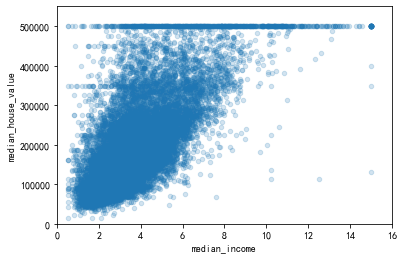

In [15]:
housing_train.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.2)
plt.axis([0, 16, 0, 550000])
# plt.savefig("income_vs_house_value_scatterplot.png", dpi=300)

## 5. 属性组合

In [16]:
housing_train["rooms_per_household"] = housing_train["total_rooms"]/housing_train["households"]
housing_train["bedrooms_per_room"] = housing_train["total_bedrooms"]/housing_train["total_rooms"]
housing_train["population_per_household"]=housing_train["population"]/housing_train["households"]

# 计算相关矩阵
corr_matrix = housing_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 6. 数据处理
### 6.1 数据清洗

In [17]:
# 获取删除标签列后的数据集
housing = strat_train_set.drop("median_house_value", axis=1)
# 标签列
housing_labels = strat_train_set["median_house_value"].copy()

from sklearn.impute import SimpleImputer

# 创建SimpleImputer实例，设置中位数替换
imputer = SimpleImputer(strategy="median")
# 创建一个没有文本属性"ocean_proximity"的数据集
housing_num = housing.drop("ocean_proximity", axis=1)
# 将imputer实例适配到housing_num
imputer.fit(housing_num)
# 执行中位数替换缺失值的转化。
X = imputer.transform(housing_num)
# 将numpy数组转换成DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

### 6.2 处理文本和分类属性

In [18]:
# 注意：[["ocean_proximity"]]获得DataFrame类型的数据，因为后面需要对二维数据进行转化
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
# 拟合并转换
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [20]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [22]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### 6.3 自定义转换器

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

# 选取列名
col_names = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        # 根据超参数add_bedrooms_per_room判断是否需要添加该组合属性
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# 将housing_extra_attribs从array转为DataFrame
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 6.4 流水线式数据转换

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
		# 中位数替换缺失值
        ('imputer', SimpleImputer(strategy="median")),
        # 添加组合属性
        ('attribs_adder', CombinedAttributesAdder()),
        # 归一化，统一量纲
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [25]:
from sklearn.compose import ColumnTransformer

# 获得数值列名称列表
num_attribs = list(housing_num)
# 获得类别列名称列表
cat_attribs = ["ocean_proximity"]

# 元组中的三个参数分别代表：名称（自定），转换器，以及一个该转换器能够应用的列名字（或索引）的列表
full_pipeline = ColumnTransformer([
		# 数值属性列转换器
        ("num", num_pipeline, num_attribs),
        # 文本属性列转换器
        ("cat", OneHotEncoder(), cat_attribs),
    ])
# 将ColumnTranformer应用到房屋数据
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## 7. 选择和训练模型
### 7.1 训练和评估训练集

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# 模型训练
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [27]:
# 在几个训练实例上应用完整的预处理
some_data = housing.iloc[:5]    # 测试集
some_labels = housing_labels.iloc[:5]    # 测试标签
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [28]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
# 均方误差
lin_mse = mean_squared_error(housing_labels, housing_predictions)
# 均方根误差
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
# 模型训练
tree_reg.fit(housing_prepared, housing_labels)
# 模型预测
housing_predictions = tree_reg.predict(housing_prepared)
# 均方误差
tree_mse = mean_squared_error(housing_labels, housing_predictions)
# 均方根误差
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 7.2 使用交叉验证来更好地进行评估

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(temp_scores):
    print("Scores:", temp_scores)
    print("Mean:", temp_scores.mean())
    print("Standard deviation:", temp_scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [31]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


In [32]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [33]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


## 8. 微调模型
### 8.1 网格搜索

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 尝试3×4=12种超参数组合
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # 之后设置bootstrap=False，再尝试2×3=6种超参数组合
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 训练5次，总共（12+6）×5=90次
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [36]:
param_grid = [
    {'n_estimators': [30, 50, 70, 90], 'max_features': [7, 8, 9]},
  ]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 70}

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=70, random_state=42)

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50026.523779989046 {'max_features': 7, 'n_estimators': 30}
49645.396740079595 {'max_features': 7, 'n_estimators': 50}
49522.74020291307 {'max_features': 7, 'n_estimators': 70}
49365.408208207395 {'max_features': 7, 'n_estimators': 90}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
49299.900206837825 {'max_features': 8, 'n_estimators': 50}
49190.52753811379 {'max_features': 8, 'n_estimators': 70}
49205.87795881896 {'max_features': 8, 'n_estimators': 90}
50346.62698827609 {'max_features': 9, 'n_estimators': 30}
49784.87120430143 {'max_features': 9, 'n_estimators': 50}
49550.18302582371 {'max_features': 9, 'n_estimators': 70}
49454.18522618171 {'max_features': 9, 'n_estimators': 90}


### 8.2 随机搜索

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_distribs = {
        # 均匀离散随机变量
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=7, high=9),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FB150ECAC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FB150B1D00>},
                   random_state=42, scoring='neg_mean_squared_error')

In [40]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51362.5712481849 {'max_features': 7, 'n_estimators': 15}
49526.393143206195 {'max_features': 7, 'n_estimators': 72}
50459.4456269365 {'max_features': 7, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
49517.48687348733 {'max_features': 7, 'n_estimators': 75}
49374.22191328315 {'max_features': 7, 'n_estimators': 88}
49296.49107827782 {'max_features': 7, 'n_estimators': 100}
49121.43705778098 {'max_features': 8, 'n_estimators': 152}
49205.20323622068 {'max_features': 7, 'n_estimators': 150}


### 8.3 分析最佳模型及其误差

In [41]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.07113427e-02, 6.32464761e-02, 4.33224405e-02, 1.48444081e-02,
       1.46489796e-02, 1.51144613e-02, 1.42221649e-02, 3.72669126e-01,
       4.82756457e-02, 1.10671759e-01, 5.97067748e-02, 7.40297962e-03,
       1.60061518e-01, 7.21860994e-05, 2.01823445e-03, 3.01150298e-03])

In [42]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder: OneHotEncoder()
cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs: ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37266912572963984, 'median_income'),
 (0.16006151831875645, 'INLAND'),
 (0.11067175904270837, 'pop_per_hhold'),
 (0.07071134270460964, 'longitude'),
 (0.06324647613420213, 'latitude'),
 (0.05970677479869098, 'bedrooms_per_room'),
 (0.04827564572405959, 'rooms_per_hhold'),
 (0.04332244052615043, 'housing_median_age'),
 (0.0151144612861454, 'population'),
 (0.014844408076168051, 'total_rooms'),
 (0.014648979569232187, 'total_bedrooms'),
 (0.014222164937653402, 'households'),
 (0.007402979623264323, '<1H OCEAN'),
 (0.0030115029833783983, 'NEAR OCEAN'),
 (0.002018234445974855, 'NEAR BAY'),
 (7.218609936598133e-05, 'ISLAND')]

### 8.4 通过测试集评估系统

In [43]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 数据处理
X_test_prepared = full_pipeline.transform(X_test)
# 模型预测
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47212.70175209911

In [44]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45214.65297702, 49129.55902136])